定义分类器

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data_train = np.array(pd.read_csv(r'train_data.csv'))
data_test = np.array(pd.read_csv(r'test_data.csv'))
data_val = np.array(pd.read_csv(r'val_data.csv'))

train_mean=np.zeros((5,1))
train_sigma=np.ones((5,1))
#print(data_train)
for i in range(4):
    train_mean[i]=np.mean(data_train[:,i])
    train_sigma[i]=np.std(data_train[:,i])
#print(train_mean)
#print(train_sigma)
data_train=(data_train-train_mean.T)/train_sigma.T
data_val=(data_val-train_mean.T)/train_sigma.T
#print(data_val)

In [45]:
def KNN(dis_kind,k):#距离度量函数类型，k值，dis_kind=1，2，inf分别为欧式、曼哈顿、切比雪夫距离
    if (k % 2) == 0:#只取k为奇数
        return 0
    result=np.zeros((data_val.shape[0],1))
    for i in range(0,data_val.shape[0]):
        distance = np.zeros((data_train.shape[0],2))
        for j in range(0,data_train.shape[0]):#计算待测点和训练集所有点的距离
            distance[j,0]=np.linalg.norm(data_val[i,0:4]-data_train[j,0:4], ord=dis_kind)
        distance[:,1]=range(data_train.shape[0])
        a=np.lexsort(distance.T[:1,:])#排序后获取在原数组中的位置
        sort=distance[a,:]
        count1=0#属于类别1的个数
        count0=0#属于类别0的个数
        for j in range(k):
            if data_train[int(sort[j,1]),4]==1:
                count1=count1+1
            else:
                count0=count0+1
        for n in range(1,10):#考察在近邻边界上是否有重叠的点
            if sort[n+j,0]!=sort[j,0]:#没有，退出
                break
            else:
                if data_train[int(sort[n+j,1]),4]==1:
                    count1=count1+1
                else:
                    count0=count0+1

        if count1>count0:#选择数量占多数的类别
            result[i]=1

    correct=0
    for i in range(0,data_val.shape[0]):
        if result[i,0]==data_val[i,4]:
            correct=correct+1
    return correct/data_val.shape[0]

交叉验证以及进行KNN分类

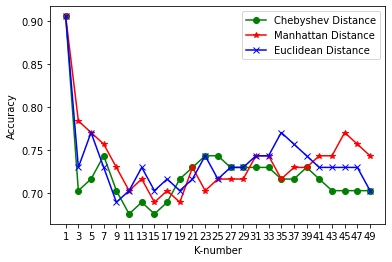

In [46]:
N=50
KNN_E=np.zeros((N,1))
KNN_M=np.zeros((N,1))
KNN_C=np.zeros((N,1))
for k in range(0,N):
    KNN_E[k]=KNN(2,k+1)
    KNN_M[k]=KNN(1,k+1)
    KNN_C[k]=KNN(np.inf,k+1)

x=np.arange(1,N+1)
plt.plot(x[::2],KNN_C[::2],marker='o',c='green',label='Chebyshev Distance')
plt.plot(x[::2],KNN_M[::2],marker='*',c='red',label='Manhattan Distance')
plt.plot(x[::2],KNN_E[::2],marker='x',c='blue',label='Euclidean Distance')
x_tick = np.linspace(1,N,N)
plt.xticks(x_tick[::2])
plt.legend(loc="upper right")
plt.xlabel('K-number')
plt.ylabel('Accuracy')
plt.savefig('Accuracy2.png',dpi=600)
plt.show()

In [50]:
print(np.mean(KNN_E)*2)
print(np.mean(KNN_M)*2)
print(np.mean(KNN_C)*2)

0.7356756756756755
0.7378378378378377
0.7216216216216216


对测试集做预测

In [52]:
def KNN_pred(dis_kind,k,data_val):#距离度量函数类型，k值，dis_kind=1，2，inf分别为欧式、曼哈顿、切比雪夫距离
    if (k % 2) == 0:#只取奇数
        return 0
    result=np.zeros((data_val.shape[0],1))
    for i in range(0,data_val.shape[0]):
        distance = np.zeros((data_train.shape[0],2))#计算待测点和训练集所有点的距离
        for j in range(0,data_train.shape[0]):
            distance[j,0]=np.linalg.norm(data_val[i,0:4]-data_train[j,0:4], ord=dis_kind)
        distance[:,1]=range(data_train.shape[0])
        a=np.lexsort(distance.T[:1,:])#排序后获取在原数组中的位置
        sort=distance[a,:]
        count1=0#属于类别1的个数
        count0=0#属于类别0的个数
        for j in range(k):
            if data_train[int(sort[j,1]),4]==1:
                count1=count1+1
            else:
                count0=count0+1
        for n in range(1,10):
            if sort[n+j,0]!=sort[j,0]:#考察在近邻边界上是否有重叠的点
                break#没有，退出
            else:
                if data_train[int(sort[n+j,1]),4]==1:
                    count1=count1+1
                else:
                    count0=count0+1

        if count1>count0:#选择数量占多数的类别
            result[i]=1

    return result

In [56]:

data_test2=np.zeros(data_test.shape)
for i in range(4):
    data_test2[:,i]=(data_test[:,i]-train_mean[i])/train_sigma[i]
    
pred = KNN_pred(1,1,data_test2)
prediction=np.c_[data_test,pred]
prediction=prediction.astype(np.uint16)
sample={
    'Recency (months)':prediction[:,0],
    'Frequency (times)':prediction[:,1],
    'Monetary (c.c. blood)':prediction[:,2],
    'Time (months)':prediction[:,3],
    'My prediction':prediction[:,4],
}
pd.DataFrame(sample).to_csv('task1_test_Euclidean.csv',index=False)

pred = KNN_pred(2,1,data_test2)
prediction=np.c_[data_test,pred]
prediction=prediction.astype(np.uint16)
sample={
    'Recency (months)':prediction[:,0],
    'Frequency (times)':prediction[:,1],
    'Monetary (c.c. blood)':prediction[:,2],
    'Time (months)':prediction[:,3],
    'My prediction':prediction[:,4],
}
pd.DataFrame(sample).to_csv('task1_test_Manhattan.csv',index=False)

pred = KNN_pred(np.inf,1,data_test2)
prediction=np.c_[data_test,pred]
prediction=prediction.astype(np.uint16)
sample={
    'Recency (months)':prediction[:,0],
    'Frequency (times)':prediction[:,1],
    'Monetary (c.c. blood)':prediction[:,2],
    'Time (months)':prediction[:,3],
    'My prediction':prediction[:,4],
}
pd.DataFrame(sample).to_csv('task1_test_Chebyshev.csv',index=False)